**Data Cleaning for following tables:**
* trr_subjectweapon_refresh
* trr_weapondischarge_refresh
* trr_charge_refresh

**Import Packages:**

In [1]:
pip install missingno

In [2]:
import pandas as pd
import missingno as msno
import psycopg2

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


**Access the CPDB server:**

In [3]:
conn = psycopg2.connect(
    host="codd01.research.northwestern.edu",
    database="postgres",
    user="cpdbstudent",
    password="DataSci4AI")

In [4]:
cur = conn.cursor()

**Access trr_trr table:**

In [5]:
cur.execute('SELECT * from trr_trr')
trr_trr = cur.fetchall()
#df.columns = cur.keys()

df_trr = pd.DataFrame(trr_trr)

colnames = [desc[0] for desc in cur.description]


df_trr.columns = colnames

**Access trr_trr_refresh:**

In [6]:
#trr_trr_refresh
cur.execute('SELECT * from trr_trr_refresh')
trr_trr_refresh = cur.fetchall()

df_r = pd.DataFrame(trr_trr_refresh)

colnames = [desc[0] for desc in cur.description]

df_r.columns = colnames

**Access the trr_subjectweapon_refresh:**

In [7]:
#trr_subjectweapon_refresh
cur.execute('SELECT * from trr_subjectweapon_refresh')
trr_subjectweapon_refresh = cur.fetchall()

df_sw = pd.DataFrame(trr_subjectweapon_refresh)

colnames = [desc[0] for desc in cur.description]

df_sw.columns = colnames

**Access the trr_weapondischarge_refresh:**

In [8]:
#trr_weapondischarge_refresh
cur.execute('SELECT * from trr_weapondischarge_refresh')
trr_weapondischarge_refresh = cur.fetchall()

df_wpn = pd.DataFrame(trr_weapondischarge_refresh)

colnames = [desc[0] for desc in cur.description]


df_wpn.columns = colnames

**Access the trr_charge_refresh:**

In [9]:
#trr_charge_refresh
cur.execute('SELECT * from trr_charge_refresh')
trr_charge_refresh = cur.fetchall()
#df.columns = cur.keys()

df_charge = pd.DataFrame(trr_charge_refresh)

colnames = [desc[0] for desc in cur.description]


df_charge.columns = colnames

**Analysis of the trr_subjectweapon_refresh table:**
* The type of the column
* Missing values analysis
* Shape of the column

In [10]:
df_sw.dtypes

weapon_type           object
firearm_caliber       object
weapon_description    object
trr_report_id          int64
dtype: object

In [11]:
df_sw.isnull().sum()

weapon_type               0
firearm_caliber       11113
weapon_description    10587
trr_report_id             0
dtype: int64

In [12]:
df_sw['firearm_caliber'].value_counts()

 9 MM       207
40 S&W      105
380 ACP      69
 38 CAL      54
45 CAL       39
UNKNOWN      33
OTHER        19
22 LR        18
357 MAG      16
32 CAL       14
25 ACP       14
22 SHORT     12
 45 ACP       8
44 CAL        4
7.62          2
12 GA         2
410           1
223/5.56      1
Name: firearm_caliber, dtype: int64

In [13]:
df_sw['firearm_caliber'].value_counts().sum()

618

In [14]:
df_sw.describe()

,trr_report_id
count,1.173100e+04
mean,1.295628e+06
std,1.786918e+06
min,9.645400e+04
25%,1.019235e+05
50%,5.082090e+05
75%,1.485620e+06
max,6.352461e+06


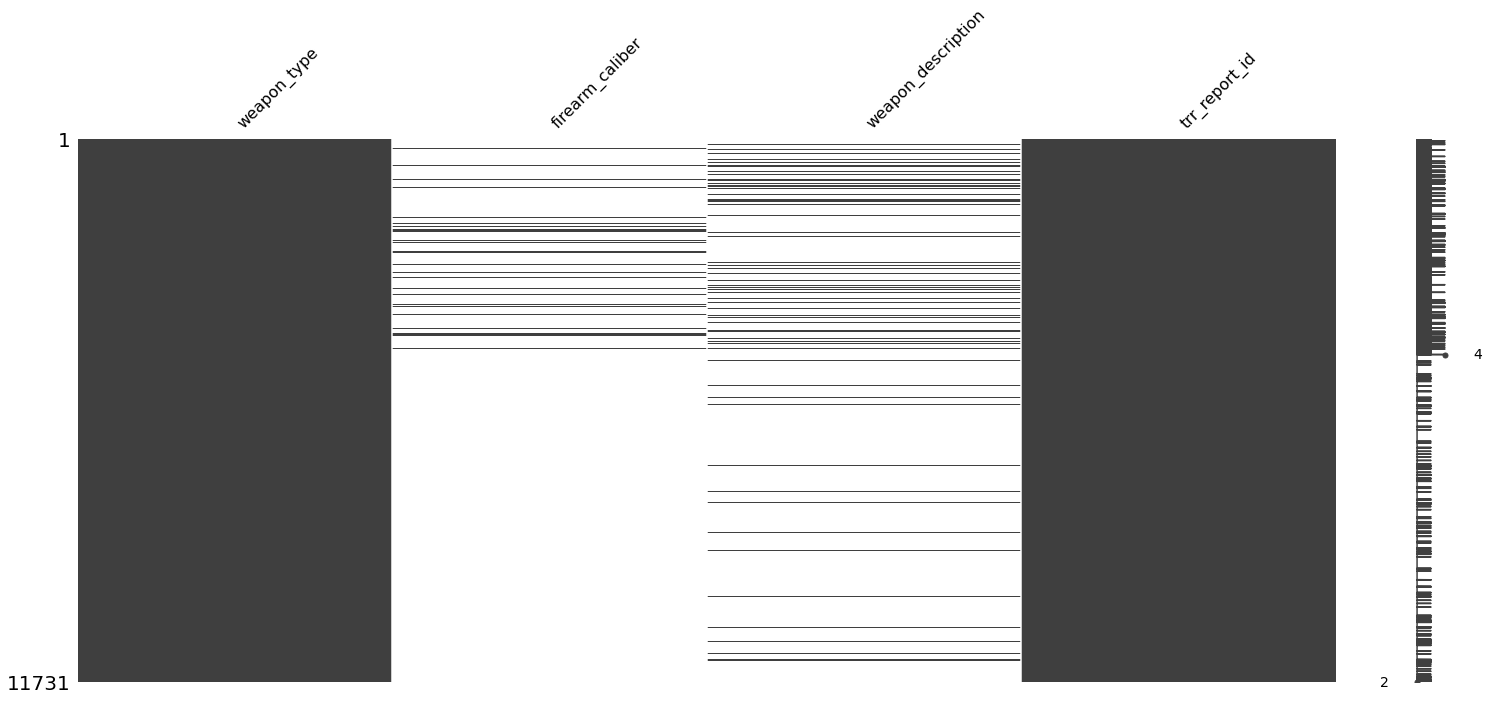

In [15]:
msno.matrix(df_sw)

In [16]:
df_sw['weapon_type'].value_counts()

HANDS/FISTS                                           5344
FEET                                                  1252
FIREARM - SEMI-AUTOMATIC                              1221
OTHER (SPECIFY)                                       1173
MOUTH (SPIT,BITE,ETC)                                 1014
VERBAL THREAT (ASSAULT)                                881
KNIFE/OTHER CUTTING INSTRUMENT                         382
FIREARM - REVOLVER                                     181
BLUNT INSTRUMENT                                       102
VEHICLE                                                 85
VEHICLE - ATTEMPTED TO STRIKE OFFICER WITH VEHICLE      36
VEHICLE - OFFICER STRUCK WITH VEHICLE                   24
CHEMICAL WEAPON                                         22
FIREARM - RIFLE                                          6
TASER / STUN GUN                                         6
FIREARM - SHOTGUN                                        2
Name: weapon_type, dtype: int64

In [17]:
df_sw['firearm_caliber'].value_counts()

 9 MM       207
40 S&W      105
380 ACP      69
 38 CAL      54
45 CAL       39
UNKNOWN      33
OTHER        19
22 LR        18
357 MAG      16
32 CAL       14
25 ACP       14
22 SHORT     12
 45 ACP       8
44 CAL        4
7.62          2
12 GA         2
410           1
223/5.56      1
Name: firearm_caliber, dtype: int64

In [18]:
df_sw['weapon_description'].value_counts()

VEHICLE                                               17
GLASS BOTTLE                                          17
SCREWDRIVER                                           12
HEAD                                                  11
HEADBUTT                                              10
                                                      ..
GYM SHOE                                               1
CLINCHED FISTS                                         1
RUGER .380 LCP                                         1
1 TAURUS 40 CAL 1 ROUND IN CHAMBER 1 MAG 10 ROUNDS     1
HANDS AND FEET                                         1
Name: weapon_description, Length: 832, dtype: int64

In [19]:
df_trr.head()

,id,beat,block,direction,street,location,trr_datetime,indoor_or_outdoor,lighting_condition,weather_condition,notify_OEMC,notify_district_sergeant,notify_OP_command,notify_DET_division,number_of_weapons_discharged,party_fired_first,location_recode,taser,total_number_of_shots,firearm_used,number_of_officers_using_firearm,officer_assigned_beat,officer_on_duty,officer_in_uniform,officer_injured,officer_rank,subject_id,subject_armed,subject_injured,subject_alleged_injury,subject_age,subject_birth_year,subject_gender,subject_race,officer_id,officer_unit_id,officer_unit_detail_id,point,created_at,updated_at,crid,event_id
0,71675,612,78XX,South,Aberdeen St,Sidewalk,2012-07-15 19:39:00-05:00,Outdoor,GOOD ARTIFICIAL,CLEAR,False,False,False,False,NaN,None,Sidewalk,False,0,False,0,0611R,True,True,False,Police Officer,24964,False,False,False,30.0,1981.0,M,BLACK,16.0,7,NaN,0101000020E610000035423F53AFE955C08489F5FC1FE0...,2019-01-08 22:43:07.860473-06:00,2019-01-08 22:43:11.294093-06:00,None,1219800318
1,71676,421,31XX,East,77Th St,Park Property,2012-07-15 17:39:00-05:00,Outdoor,GOOD ARTIFICIAL,CLEAR,False,False,False,False,NaN,None,Park Property,False,0,False,0,0404F,True,True,False,Police Officer,24963,False,False,False,32.0,1979.0,F,BLACK,21521.0,9,5.0,0101000020E6100000CF49EF1B5FE355C0E0A35934F8E0...,2019-01-08 22:43:07.860473-06:00,2019-01-08 22:43:11.294093-06:00,None,1219713830
2,71677,624,75XX,South,Langley Ave,Residence,2012-07-16 06:15:00-05:00,Indoor,GOOD ARTIFICIAL,CLEAR,True,True,False,False,1.0,OFFENDER,Residence,True,0,False,0,631,True,True,False,Police Officer,24965,False,True,True,39.0,1973.0,M,BLACK,29979.0,7,NaN,0101000020E610000053318452EAE655C01F477364E5E0...,2019-01-08 22:43:07.860473-06:00,2019-01-08 22:43:11.294093-06:00,None,1219806435
3,71678,624,75XX,South,Langley Ave,Residence,2012-07-16 06:20:00-05:00,Indoor,GOOD ARTIFICIAL,CLEAR,False,False,False,False,NaN,None,Residence,False,0,False,0,624,True,True,False,Police Officer,24965,True,True,True,39.0,1973.0,M,BLACK,29838.0,7,NaN,0101000020E610000053318452EAE655C01F477364E5E0...,2019-01-08 22:43:07.860473-06:00,2019-01-08 22:43:11.294093-06:00,None,1219806435
4,71679,1111,42XX,West,Augusta Blvd,Apartment,2012-07-16 07:51:00-05:00,Indoor,DAYLIGHT,CLEAR,True,True,False,False,1.0,None,Apartment,True,0,False,0,6759D,True,False,False,Police Officer,24966,True,False,False,33.0,1978.0,M,BLACK,22216.0,177,NaN,0101000020E6100000BD570806EBEE55C0F535261F16F3...,2019-01-08 22:43:07.860473-06:00,2019-01-08 22:43:11.294093-06:00,None,1219808591


In [20]:
df_sw['trr_report_id']

0          96454
1          96477
2          96477
3          96477
4          96477
          ...   
11726    6084801
11727    6314297
11728    6314297
11729    6352461
11730    6352461
Name: trr_report_id, Length: 11731, dtype: int64

In [21]:
df_sw['exists'] = df_sw['trr_report_id'].isin(df_trr['id'])

In [22]:
df_sw['exists'].value_counts()
print(df_sw.shape)
print(df_sw['exists'].value_counts())

(11731, 5)
False    11731
Name: exists, dtype: int64


**Analysis of the the trr_weapondischarge_refresh:**
* The size of the column
* Analyze the missing values and drop the rows with the most missing values 
* Configure the type of the column

In [23]:
df_wpn.shape

(1308, 18)

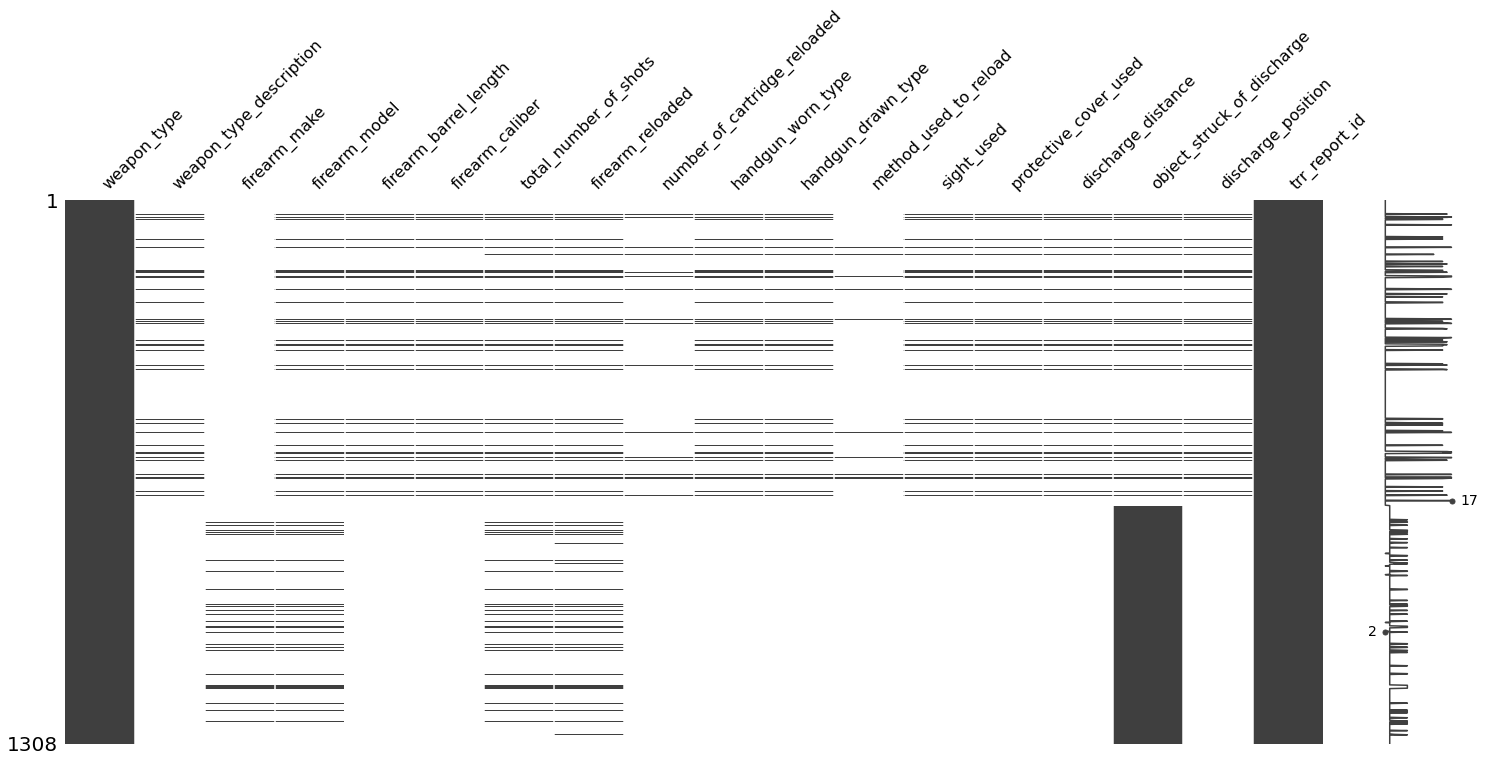

In [24]:
msno.matrix(df_wpn)

In [25]:
df_wpn.isnull().sum()

weapon_type                        0
weapon_type_description         1237
firearm_make                    1243
firearm_model                   1171
firearm_barrel_length           1236
firearm_caliber                 1237
total_number_of_shots           1170
firearm_reloaded                1164
number_of_cartridge_reloaded    1274
handgun_worn_type               1236
handgun_drawn_type              1236
method_used_to_reload           1288
sight_used                      1235
protective_cover_used           1235
discharge_distance              1236
object_struck_of_discharge       668
discharge_position              1236
trr_report_id                      0
dtype: int64

In [26]:
df_wpn.shape

(1308, 18)

In [27]:
#Option1: Delete all the rows with missing and Nan values
df_wpn_without_nan = df_wpn.dropna(how='all', 
                        subset = ['weapon_type_description' ,'firearm_make' ,'firearm_model' ,'firearm_barrel_length' ,
                               'firearm_caliber' ,'total_number_of_shots' ,'firearm_reloaded' ,'number_of_cartridge_reloaded' ,
                               'handgun_worn_type' ,'handgun_drawn_type' ,'method_used_to_reload' ,'sight_used' ,
                               'protective_cover_used' ,'discharge_distance' ,'object_struck_of_discharge' ,'discharge_position'])

In [28]:
#Option2: Delete rows which contains less than 2 non Nan values
option2 = df_wpn.dropna(thresh=2, how = 'any',
                        subset = ['weapon_type_description' ,'firearm_make' ,'firearm_model' ,'firearm_barrel_length' ,
                               'firearm_caliber' ,'total_number_of_shots' ,'firearm_reloaded' ,'number_of_cartridge_reloaded' ,
                               'handgun_worn_type' ,'handgun_drawn_type' ,'method_used_to_reload' ,'sight_used' ,
                               'protective_cover_used' ,'discharge_distance' ,'object_struck_of_discharge' ,'discharge_position'])

In [29]:
#Option2 shape
option2.shape

(144, 18)

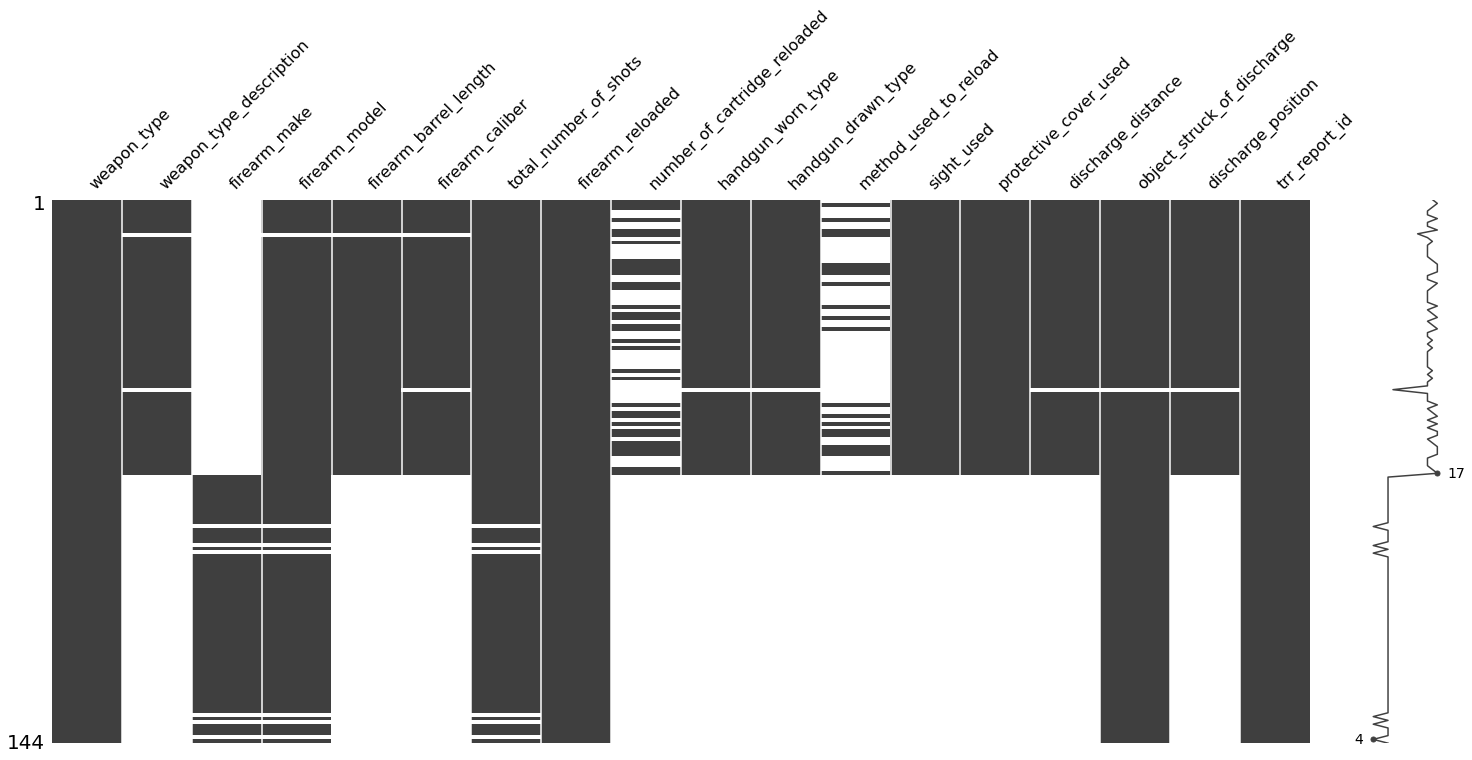

In [30]:
#Option2 in matrix
msno.matrix(option2)

In [32]:
#Types of the columns before changing the type
df_wpn_without_nan.dtypes

weapon_type                      object
weapon_type_description          object
firearm_make                     object
firearm_model                    object
firearm_barrel_length            object
firearm_caliber                  object
total_number_of_shots           float64
firearm_reloaded                 object
number_of_cartridge_reloaded    float64
handgun_worn_type                object
handgun_drawn_type               object
method_used_to_reload            object
sight_used                       object
protective_cover_used            object
discharge_distance               object
object_struck_of_discharge       object
discharge_position               object
trr_report_id                     int64
dtype: object

In [33]:
df_wpn_without_nan['firearm_reloaded'] = df_wpn_without_nan['firearm_reloaded'].astype(bool)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_wpn_without_nan['sight_used'] = df_wpn_without_nan['sight_used'].astype(bool)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
#Types of the column after changing the type
df_wpn_without_nan.dtypes

weapon_type                      object
weapon_type_description          object
firearm_make                     object
firearm_model                    object
firearm_barrel_length            object
firearm_caliber                  object
total_number_of_shots           float64
firearm_reloaded                   bool
number_of_cartridge_reloaded    float64
handgun_worn_type                object
handgun_drawn_type               object
method_used_to_reload            object
sight_used                         bool
protective_cover_used            object
discharge_distance               object
object_struck_of_discharge       object
discharge_position               object
trr_report_id                     int64
dtype: object

**Analyzing the trr_charge_refresh:**
* Look for missing values 
* Check every column and identify what to change

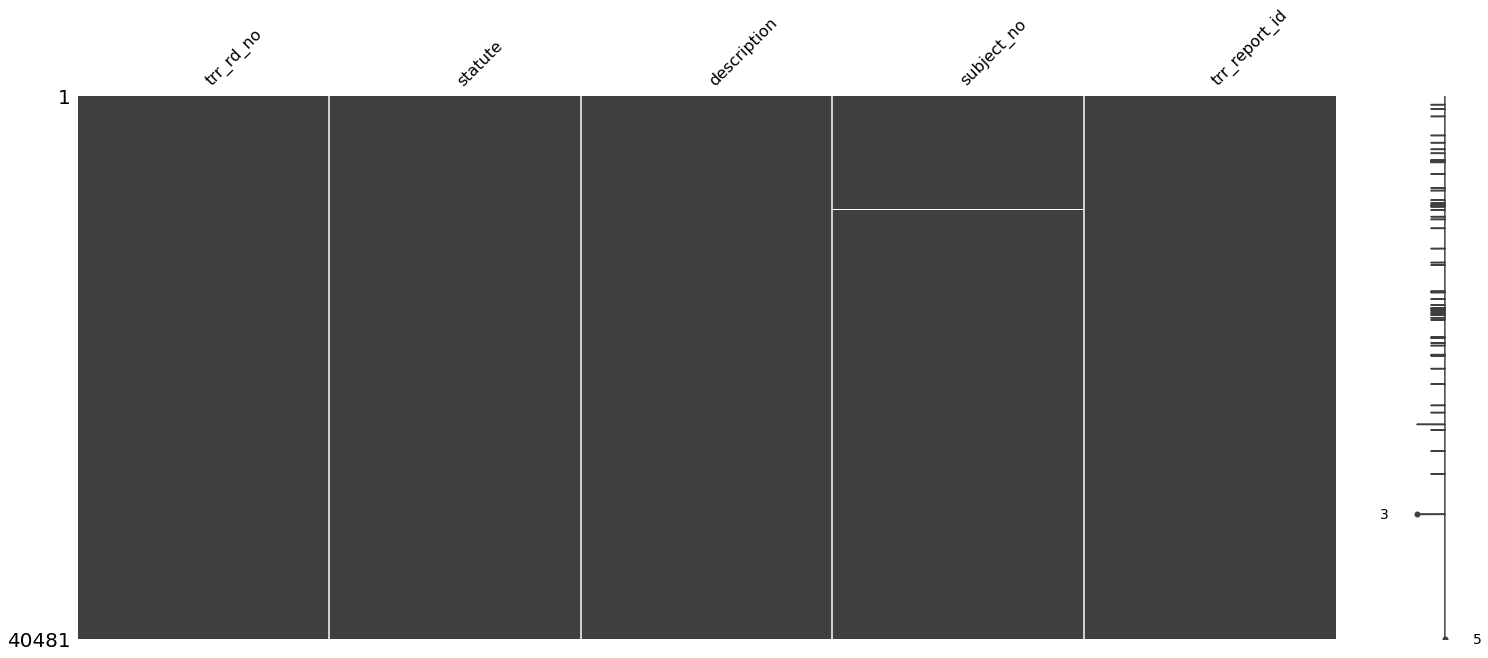

In [36]:
msno.matrix(df_charge)

In [37]:
df_charge['description'].unique()

array(['AGG BATTERY/PEACE OFFICER',
       'ROBBERY - AGG ROBBERY/INDICATE ARM W/FIR ',
       'RESISTING/OBSTRUCT/PC OFF/CORR EMP/FRFTR',
       'SOLICITING UNLAWFUL BUSINESS', 'OBSTRUCTING IDENTIFICATION',
       'PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D)',
       'ISSUANCE OF WARRANT', 'CANNABIS - POSSESS 10-30 GRMS',
       'DOMESTIC BATTERY - BODILY HARM',
       'UUW - CARRY/POSSESS FIREARM/1ST', 'DRIVER/SEATBELT/CHILD 6<16',
       'INSURANCE - OPERATE MTR VEHICLE WITHOUT',
       'DRIVING ON REVOKED LICENSE', 'CRIM TRESPASS TO STATE LAND   ',
       'ARMED HABITUAL CRIMINAL', 'PCS - POSSESS 15<100 GRAMS COCAINE',
       'CANNABIS - POSSESS LESS THAN 2.5 GRMS', 'RESIST/OBSTRUCT OFFICER',
       'UNLAW POSS OF FIREARM BY STREET GANG MEMBER ON PERSON',
       'BATTERY - CAUSE BODILY HARM', 'BATTERY - MAKE PHYSICAL CONTACT',
       'CRIM TRESPASS TO RESIDENCE', 'CRIM DAMAGE TO PROPERTY <$300 ',
       'AGG ASSAULT PC OFFICER/VOLUNTEER',
       'AGG ASSAULT/USE DEADLY WEAPON

**Analysis of the missing values for trr_trr_refresh:**

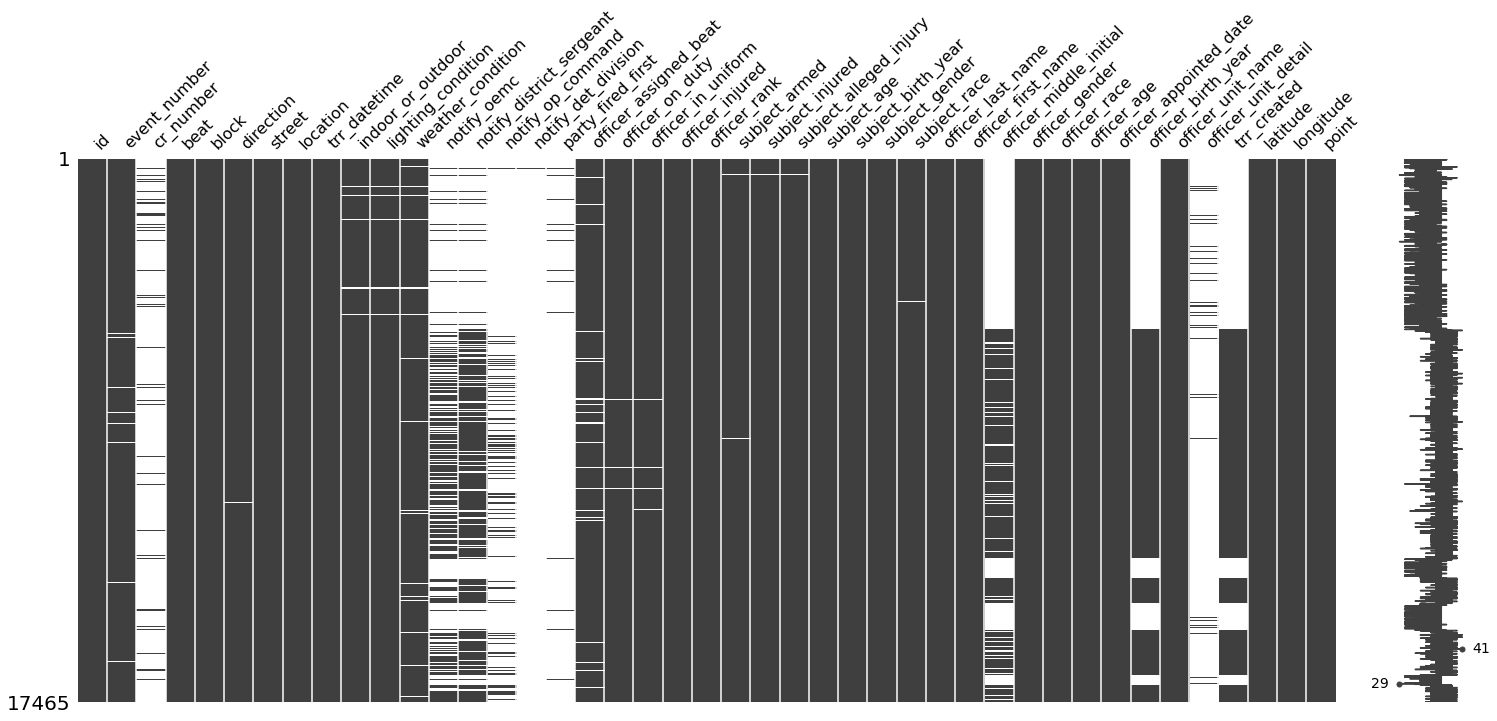

In [38]:
msno.matrix(df_r)